In [8]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [9]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [10]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [11]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [12]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [13]:
train.shape,test.shape

((31647, 18), (13564, 17))

In [14]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

# Univariate Analysis

 Now lets look at the distribution of our taget variable which is 'subscribed' as it is a categorical variable let us look at its frequency table and distribution in barplot

# train['subscribed'].value_counts()

In [15]:
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

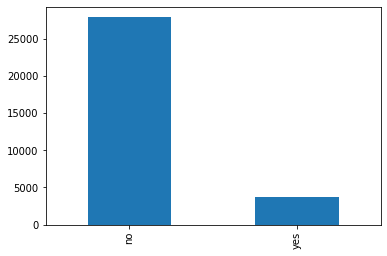

In [16]:
#bar plot
train['subscribed'].value_counts().plot.bar()

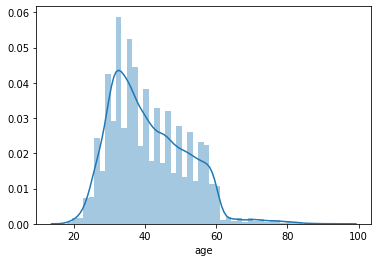

In [17]:
sn.distplot(train['age'])

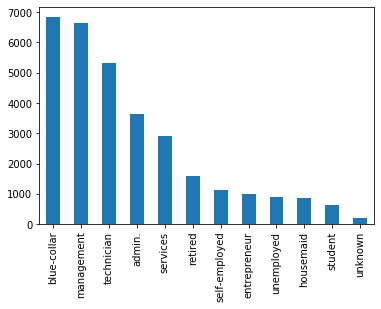

In [18]:
train['job'].value_counts().plot.bar()

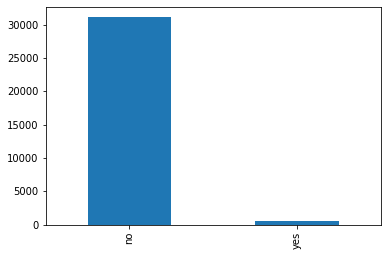

In [19]:
train['default'].value_counts().plot.bar()

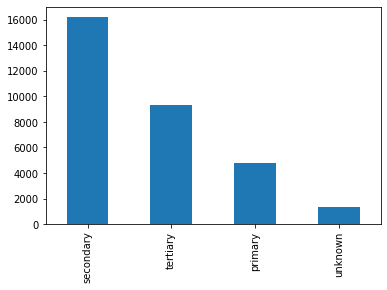

In [20]:
train['education'].value_counts().plot.bar()

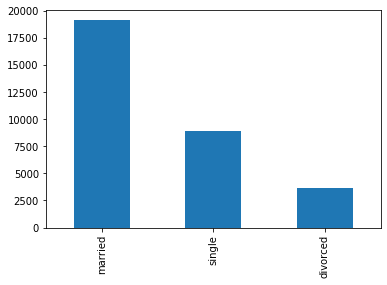

In [21]:
train['marital'].value_counts().plot.bar()

People who are mostly married, had  atleast secondary education and default history unavailble are the most clients . We will make use of scatterplots for continous or numeric variables and crosstabs for the categorical variables. Let's start with 'subscribed' variable

# Bivariate Analysis

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

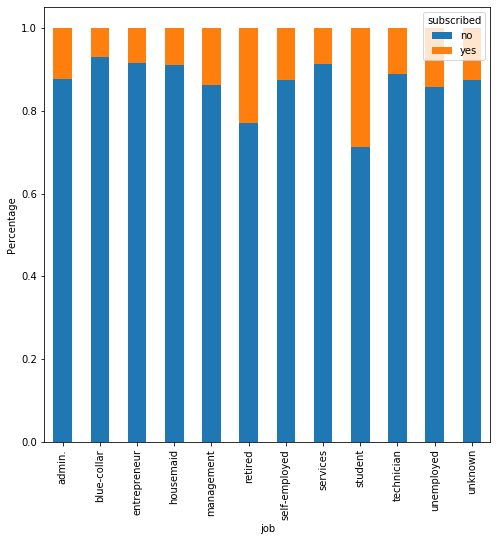

In [22]:
print(pd.crosstab(train['job'],train['subscribed']))
job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(8,8))
plt.xlabel('job')
plt.ylabel('Percentage')

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit , which is suprising as students generally do not subscribe to a term deposit.


now let's explore the default variable against the subscribed variable


subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage ')

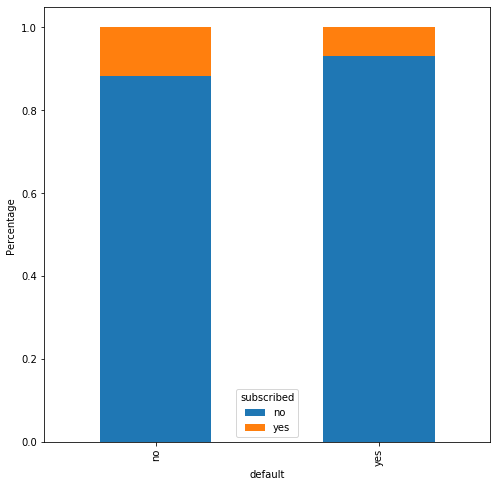

In [23]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage ')

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history

In [24]:
train['subscribed'].replace('no',0,inplace=True)
train['subscribed'].replace('yes',1,inplace=True)

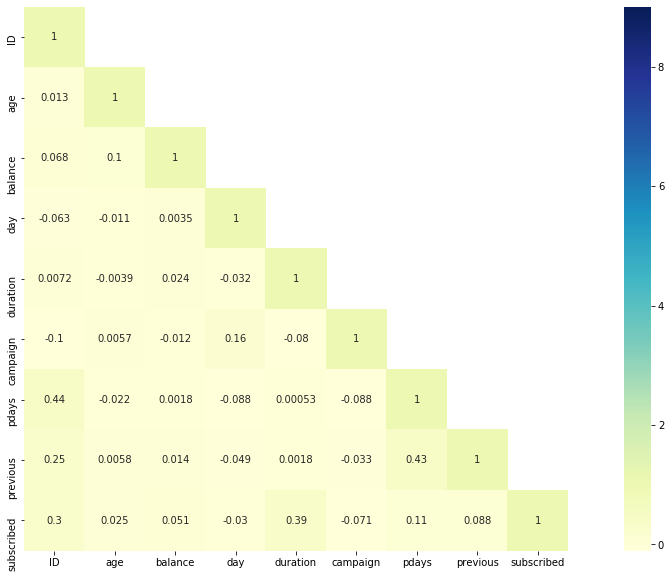

In [26]:
corr=train.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr,mask=mask,vmax=9,square=True,annot=True,cmap="YlGnBu")

In [27]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies . We will remove the ID variables as they are unique values and then apply dummies . We will also remove the target variable and keep it in a seperate variable

# Model Building

In [28]:
target=train['subscribed']
train=train.drop('subscribed',axis=1)

In [29]:
train=pd.get_dummies(train)

Now, It's time build our model. We will split the train data into training and validation set so that we will be able to validate the result of our model on the validation set. We will keep 20% data as validation set and rest as the training set

In [30]:
from sklearn.model_selection import train_test_split,

In [31]:
x_train,x_val,y_train,y_val=train_test_split(train,target,test_size=0.2,random_state=12)

Now our data is ready. Its time to build our model and check its performance . Logistic regression is used for classification problem lt's first build a Logistic Regression model

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lreg=LogisticRegression()

In [34]:
lreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
predict=lreg.predict(x_val)

In [36]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_val,predict)

0.8928909952606635

We got an accuracy score of around 90% on the validation dataset. Logistic REgression has a linear decision boundary. What if our data have non linearity ? We need a model that can capture this non linearity.


let's try decision Tree algorithm now to check if we get better accuracy with that

# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
clf=DecisionTreeClassifier(max_depth=4,random_state=0)



In [42]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [43]:
test=pd.get_dummies(test)

In [44]:
test_prediction=clf.predict(test)

Finally we will save these predictions into a csv file . You can then open this csv fle and copy paste the predictions on the provided excel file o generate score

In [56]:
submission = pd.DataFrame()

In [57]:
submission['ID']=test['ID']
submission['subscribed']=test_prediction

Since the target variable is  yes or no, we will convert 1 and 0 in the predictions to yes and no respectively

In [58]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [59]:
submission.to_csv('submission.csv',header=True,index=False)

# the accuracy of the model on the test dataset is 0.908